<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2 Machine Learning For Regression

In [67]:
import pandas as pd
import numpy as np

2.2 Data preparation

In [68]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-12 11:41:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.02s   

2025-10-12 11:41:07 (37.4 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [69]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [70]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [71]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [72]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [73]:
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


2.3 Exploratory data analysis

In [74]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['europe' 'usa' 'asia']
3

fuel_type
['gasoline' 'diesel']
2

drivetrain
['all-wheel_drive' 'front-wheel_drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [75]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [76]:
df.columns[df.isnull().any()]

Index(['horsepower'], dtype='object')

In [77]:
df['horsepower'].median()

149.0

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2.3 setting up the validation work

In [79]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n

9704

In [80]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [81]:
df.iloc[[10, 0, 3, 5]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
10,230,100.0,3111.810181,2014,13.386605
0,170,159.0,3413.433759,2003,13.231729
3,220,NaN,2542.392402,2009,16.912736
5,190,NaN,2484.883986,2008,17.271818


In [82]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [83]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [84]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [85]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
len(y_train)

5824

In [86]:
df_train.iloc[10]

,10
engine_displacement,240.000000
horsepower,159.000000
vehicle_weight,2916.987921
model_year,2001.000000


In [87]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.312

In [88]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [89]:
np.log1p(222347.2221101062)

np.float64(12.312)

In [90]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res
def linear_regression(xi):
    return w0 + dot(xi, w)
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [91]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
linear_regression(xi)

12.312

In [92]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [93]:
def linear_regression(X):
    return X.dot(w_new)
linear_regression(X)

array([12.38 , 13.552, 12.312])

In [94]:
def train_linear_regression(X, y):
    pass
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [95]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)


w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [150]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [151]:
df_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [173]:
base = ['horsepower']

#X_train = df_train[base].fillna(0).values

mean = df['horsepower'].mean()
X_train = df_train[base].fillna(mean).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [174]:
w0

np.float64(2.644139374272677)

In [175]:
w

array([0.00075011])

<Axes: ylabel='Count'>

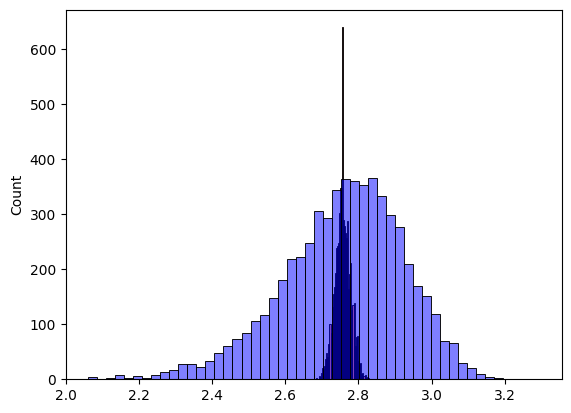

In [176]:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

2.4 RMSE

In [177]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

np.float64(0.16483405272134508)

2.5 Validation

In [178]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.17140940715265338)

2.6 Simple Feature Engineering

In [179]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['model_year']
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.1714170302910756)

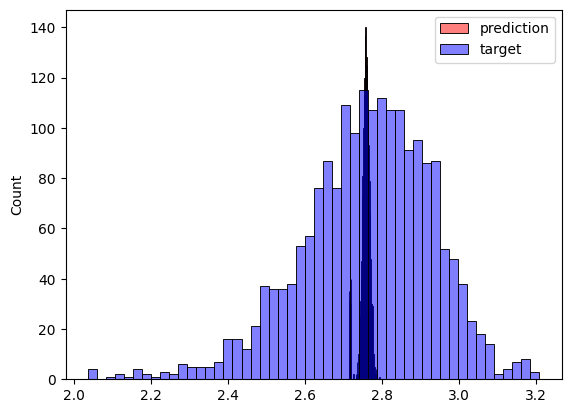

In [180]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [181]:
df_train.columns


Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [182]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

2.7 Categorical Variables

In [183]:
categorical_columns = ['engine_displacement',
                       'horsepower','vehicle_weight',
                       'model_year']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['model_year']
    features = base + ['age']


    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.17148895066961023)

In [184]:
w0, w

(np.float64(2.717390902698889),
 array([ 2.76575648e-04, -3.28949708e-04,  1.01818578e-02, -2.50372487e-04,
         9.81149767e-03,  2.35412939e-02, -1.66596463e-03, -2.20239036e-02,
        -1.23323381e-02,  3.91359762e-03,  8.72294064e-03,  3.74347061e-02,
        -2.33634295e-02,  6.94247002e-02,  2.78451590e-02, -2.37388276e-01,
        -8.32926554e-02,  3.51913115e-03, -1.50438717e-02,  2.11285597e-03,
        -1.23416521e-02,  1.81023096e-04]))

2.8 Regularization

In [185]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001],
]

X = np.array(X)
X

array([[4.      , 4.      , 4.      ],
       [3.      , 5.      , 5.      ],
       [5.      , 1.      , 1.      ],
       [5.      , 4.      , 4.      ],
       [7.      , 5.      , 5.      ],
       [4.      , 5.      , 5.000001]])

In [186]:
y= [1, 2, 3, 1, 2, 3]

In [187]:
XTX = X.T.dot(X)
XTX

array([[140.      , 111.      , 111.000004],
       [111.      , 108.      , 108.000005],
       [111.000004, 108.000005, 108.00001 ]])

In [188]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.13029882e-02, -6.18460955e+04,  6.18460502e+04],
       [-6.18460947e+04,  1.40737501e+12, -1.40737488e+12],
       [ 6.18460493e+04, -1.40737488e+12,  1.40737475e+12]])

In [189]:
XTX_inv.dot(X.T).dot(y)

array([ 4.14130492e-01, -1.76437236e+06,  1.76437228e+06])

In [190]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [191]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [192]:
XTX = XTX + 0.01 * np.eye(3)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [193]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.1714891568935632)

2.9 Turing the model

In [194]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 2.717390902698889 0.17148895066961023
0.01 2.7173401137996454 0.1714891568935632
0.1 2.716883144972633 0.17149108445018285
1 2.712325003208064 0.1715168812687252
5 2.6922901091374065 0.1717623999642145
10 2.6677337623044357 0.1723521392849748
100 2.298732296697006 0.21469820832813546


In [195]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.1714889712193574)

2.10 Using the model